<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/SlopesXGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2 Classes**
* (1) prevention    36283
* (0) rapid         16337


**3 Classes**
* (1) normal        22980
* (0) rapid         16337
* (2) prevention    13303

## BI2

In [2]:
import pandas as pd
bi2 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_2_Group_5_Fold.xlsx')
bi2 = bi2.iloc[:, 1:]
bi2

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL25:Parathyroid hormone,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,Fold
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,1,1,1,1,1,1,1,1,prevention,1
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,1,1,1,1,1,1,1,1,prevention,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,prevention,4
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,prevention,0
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,prevention,1
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,2


In [3]:
bi2['NATNL'] = bi2['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [4]:
bi2 = bi2.sort_values(['PatientUID', 'PatientVisitUID'])
bi2['TimeDiff'] = bi2.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
bi2['TimeDiff'] = bi2['TimeDiff'].fillna(0)

In [5]:
bi2['time_t1'] = pd.to_datetime(bi2['time_t1'])

In [6]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(bi2[column].unique())}
    bi2[column] = bi2[column].map(encoding_map)

## BI3

In [7]:
import pandas as pd
bi3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_3_Group_5_Fold.xlsx')
bi3 = bi3.iloc[:, 1:]
bi3

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL25:Parathyroid hormone,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,Fold
0,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
1,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
3,2299,4546471,5.550691,90,90,0,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,100,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,prevention,4
52616,3319971,9270331,-0.692078,0,100,0,0,0,0,0,...,1,1,0,0,1,1,1,1,normal,0
52617,3320048,9242721,7.217875,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,normal,1
52618,3320050,9257281,-32.794557,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,2


In [8]:
bi3['NATNL'] = bi3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [9]:
bi3 = bi3.sort_values(['PatientUID', 'PatientVisitUID'])
bi3['TimeDiff'] = bi3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
bi3['TimeDiff'] = bi3['TimeDiff'].fillna(0)

In [10]:
bi3['time_t1'] = pd.to_datetime(bi3['time_t1'])

In [11]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(bi3[column].unique())}
    bi3[column] = bi3[column].map(encoding_map)

## MF2

In [12]:
import pandas as pd
data2 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_2_Group_5_Fold.xlsx')
data2 = data2.iloc[:, 1:]
data2

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,rapid,1
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,prevention,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,rapid,1
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,rapid,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,prevention,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,prevention,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,prevention,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,prevention,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,rapid,2


In [13]:
data2['NATNL'] = data2['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [14]:
data2 = data2.sort_values(['PatientUID', 'PatientVisitUID'])
data2['TimeDiff'] = data2.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data2['TimeDiff'] = data2['TimeDiff'].fillna(0)

In [15]:
data2['time_t1'] = pd.to_datetime(data2['time_t1'])

In [16]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data2[column].unique())}
    data2[column] = data2[column].map(encoding_map)

## MF3

In [17]:
import pandas as pd
data3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_3_Group_5_Fold.xlsx')
data3 = data3.iloc[:, 1:]
data3

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,rapid,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,rapid,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,rapid,1
3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,normal,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,prevention,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,normal,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,normal,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,rapid,2


In [18]:
data3['NATNL'] = data3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [19]:
data3 = data3.sort_values(['PatientUID', 'PatientVisitUID'])
data3['TimeDiff'] = data3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data3['TimeDiff'] = data3['TimeDiff'].fillna(0)

In [20]:
data3['time_t1'] = pd.to_datetime(data3['time_t1'])

In [21]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data3[column].unique())}
    data3[column] = data3[column].map(encoding_map)

# Stage

In [22]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 0
    elif 89.99 >= eGFR_value >= 60:
        return 1
    elif 59.99 >= eGFR_value >= 30:
        return 2
    elif 29.99 >= eGFR_value >= 15:
        return 3
    else:
        return 4

bi2['Stage'] = bi2['eGFR_t1'].apply(categorize_eGFR)
bi3['Stage'] = bi3['eGFR_t1'].apply(categorize_eGFR)
data2['Stage'] = data2['eGFR_t1'].apply(categorize_eGFR)
data3['Stage'] = data3['eGFR_t1'].apply(categorize_eGFR)

In [23]:
data2['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

In [24]:
bi2['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

In [25]:
bi3['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

In [26]:
data3['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

# Split Fold

In [27]:
!pip install shap

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
import shap
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## bi2

In [29]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = bi2.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = bi2['Slopes']
all_folds = bi2['Fold'].unique()
X_train_scaled_list_bi2 = []
y_train_list_bi2 = []
X_test_scaled_list_bi2 = []
y_test_list_bi2 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = bi2['Fold'].isin(train_folds)
    test_indices = bi2['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_bi2.append(X_train_scaled)
    y_train_list_bi2.append(y_train)
    X_test_scaled_list_bi2.append(X_test_scaled)
    y_test_list_bi2.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_bi2, y_train_list_bi2, X_test_scaled_list_bi2, y_test_list_bi2, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (42027, 122)
Test set size: (10593, 122)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Training set size: (42017, 122)
Test set size: (10603, 122)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Training set size: (42184, 122)
Test set size: (10436, 122)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (41978, 122)
Test set size: (10642, 122)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Training set size: (42274, 122)
Test set size: (10346, 122)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---



## bi3

In [30]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = bi3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = bi3['Slopes']
all_folds = bi3['Fold'].unique()
X_train_scaled_list_bi3 = []
y_train_list_bi3 = []
X_test_scaled_list_bi3 = []
y_test_list_bi3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_bi3.append(X_train_scaled)
    y_train_list_bi3.append(y_train)
    X_test_scaled_list_bi3.append(X_test_scaled)
    y_test_list_bi3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_bi3, y_train_list_bi3, X_test_scaled_list_bi3, y_test_list_bi3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (42017, 122)
Test set size: (10603, 122)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (42184, 122)
Test set size: (10436, 122)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Training set size: (42027, 122)
Test set size: (10593, 122)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Training set size: (41978, 122)
Test set size: (10642, 122)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Training set size: (42274, 122)
Test set size: (10346, 122)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---



## data2

In [31]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = data2.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = data2['Slopes']
all_folds = data2['Fold'].unique()
X_train_scaled_list_data2 = []
y_train_list_data2 = []
X_test_scaled_list_data2 = []
y_test_list_data2 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_data2.append(X_train_scaled)
    y_train_list_data2.append(y_train)
    X_test_scaled_list_data2.append(X_test_scaled)
    y_test_list_data2.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_data2, y_train_list_data2, X_test_scaled_list_data2, y_test_list_data2, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (42184, 76)
Test set size: (10436, 76)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (42017, 76)
Test set size: (10603, 76)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Training set size: (42027, 76)
Test set size: (10593, 76)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Training set size: (41978, 76)
Test set size: (10642, 76)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Training set size: (42274, 76)
Test set size: (10346, 76)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---



## data3

In [32]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = data3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes'], axis=1)
y = data3['Slopes']
all_folds = data3['Fold'].unique()
X_train_scaled_list_data3 = []
y_train_list_data3 = []
X_test_scaled_list_data3 = []
y_test_list_data3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_data3.append(X_train_scaled)
    y_train_list_data3.append(y_train)
    X_test_scaled_list_data3.append(X_test_scaled)
    y_test_list_data3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_data3, y_train_list_data3, X_test_scaled_list_data3, y_test_list_data3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    print(f"Training set size: {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")


Training set size: (41978, 76)
Test set size: (10642, 76)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Training set size: (42027, 76)
Test set size: (10593, 76)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Training set size: (42274, 76)
Test set size: (10346, 76)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Training set size: (42017, 76)
Test set size: (10603, 76)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Training set size: (42184, 76)
Test set size: (10436, 76)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---



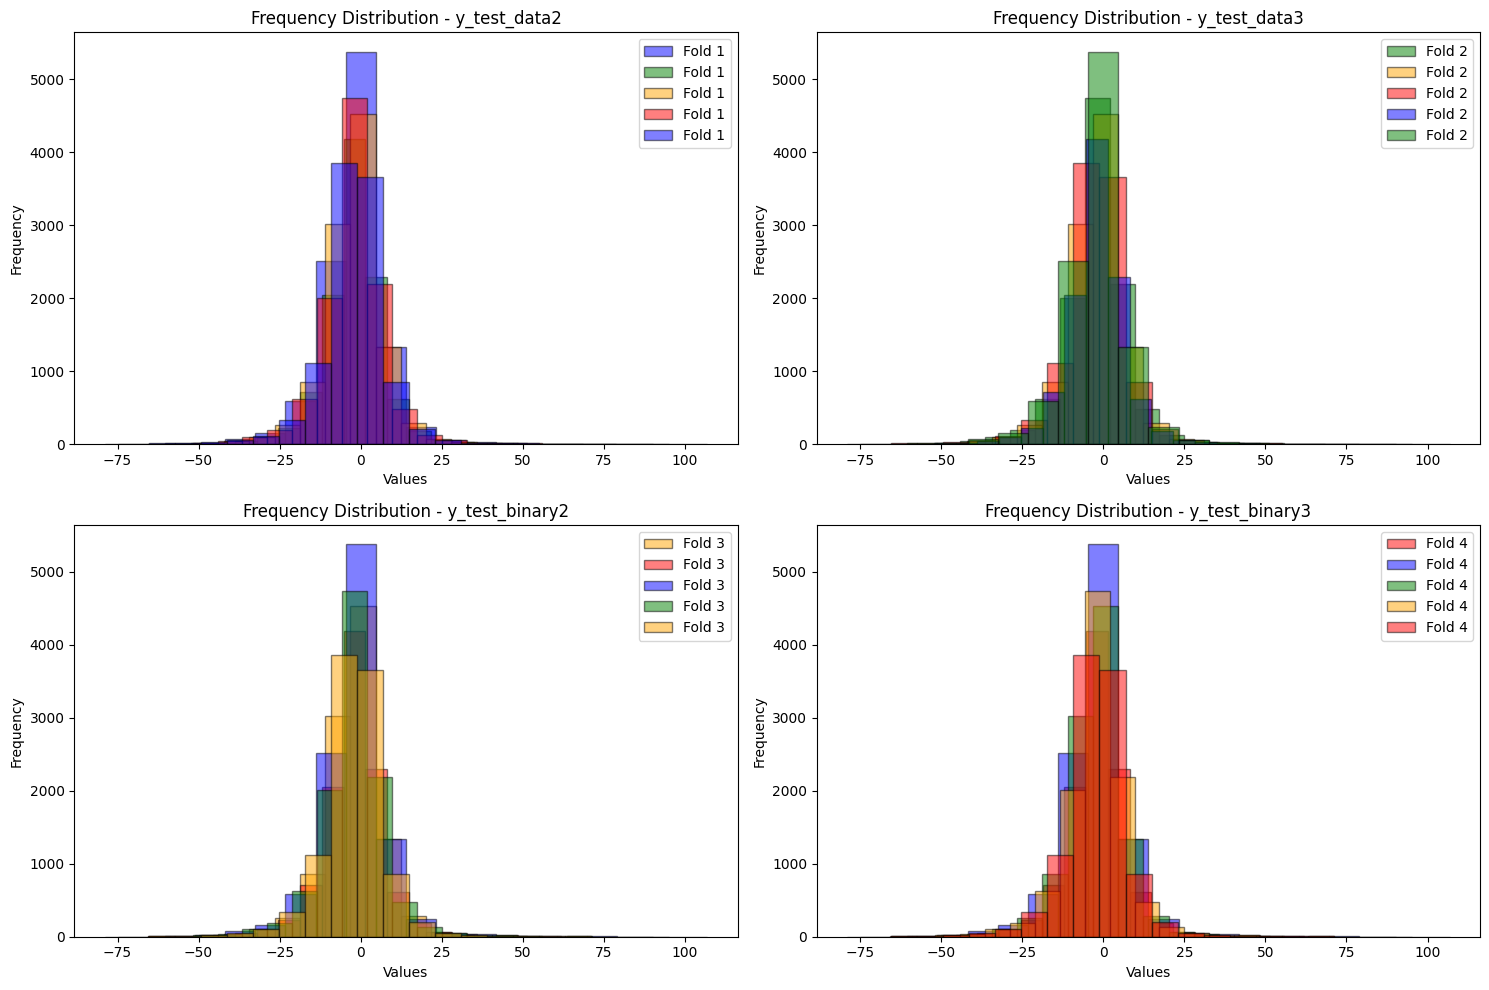

In [33]:
from itertools import cycle
all_lists_with_names = [
    ("y_test_data2", y_test_list_data2),
    ("y_test_data3", y_test_list_data3),
    ("y_test_binary2", y_test_list_bi2),
    ("y_test_binary3", y_test_list_bi3)
]

# Define a cycle of colors for the histograms
colors = cycle(['blue', 'green', 'orange', 'red'])

# Bar plot for the frequency of each value in the datasets
plt.figure(figsize=(15, 10))

for i, (list_name, current_list) in enumerate(all_lists_with_names, 1):
    plt.subplot(2, 2, i)
    for series, color in zip(current_list, colors):
        series.plot(kind='hist', bins=20, alpha=0.5, color=color, edgecolor='black', label=f'Fold {i}')
        plt.title(f'Frequency Distribution - {list_name}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.legend()

plt.tight_layout()
plt.show()

In [34]:
y_test_list_data2

[9        -7.411572
 10       24.938876
 11       -1.606380
 12        4.056631
 22        0.334096
            ...    
 52599     7.391940
 52604     8.212500
 52609     8.638005
 52614    10.568365
 52619   -36.776371
 Name: Slopes, Length: 10436, dtype: float64,
 15       -5.876161
 16        7.488793
 17      -27.716910
 18        7.290108
 19        6.853255
            ...    
 52596     3.956355
 52601     1.598681
 52606   -18.437432
 52611   -14.051193
 52616    -0.692078
 Name: Slopes, Length: 10603, dtype: float64,
 13       -8.254942
 14        1.006308
 24       -7.337137
 40       -7.814363
 41        4.010989
            ...    
 52595   -12.528117
 52600    -6.835095
 52605   -15.682864
 52610   -16.635930
 52615    -4.256753
 Name: Slopes, Length: 10593, dtype: float64,
 5        -8.126415
 6         0.877756
 7         0.169439
 8        -3.392731
 21       -9.794421
            ...    
 52598     7.978841
 52603    -0.565750
 52608    -7.454225
 52613    -1.342317
 5

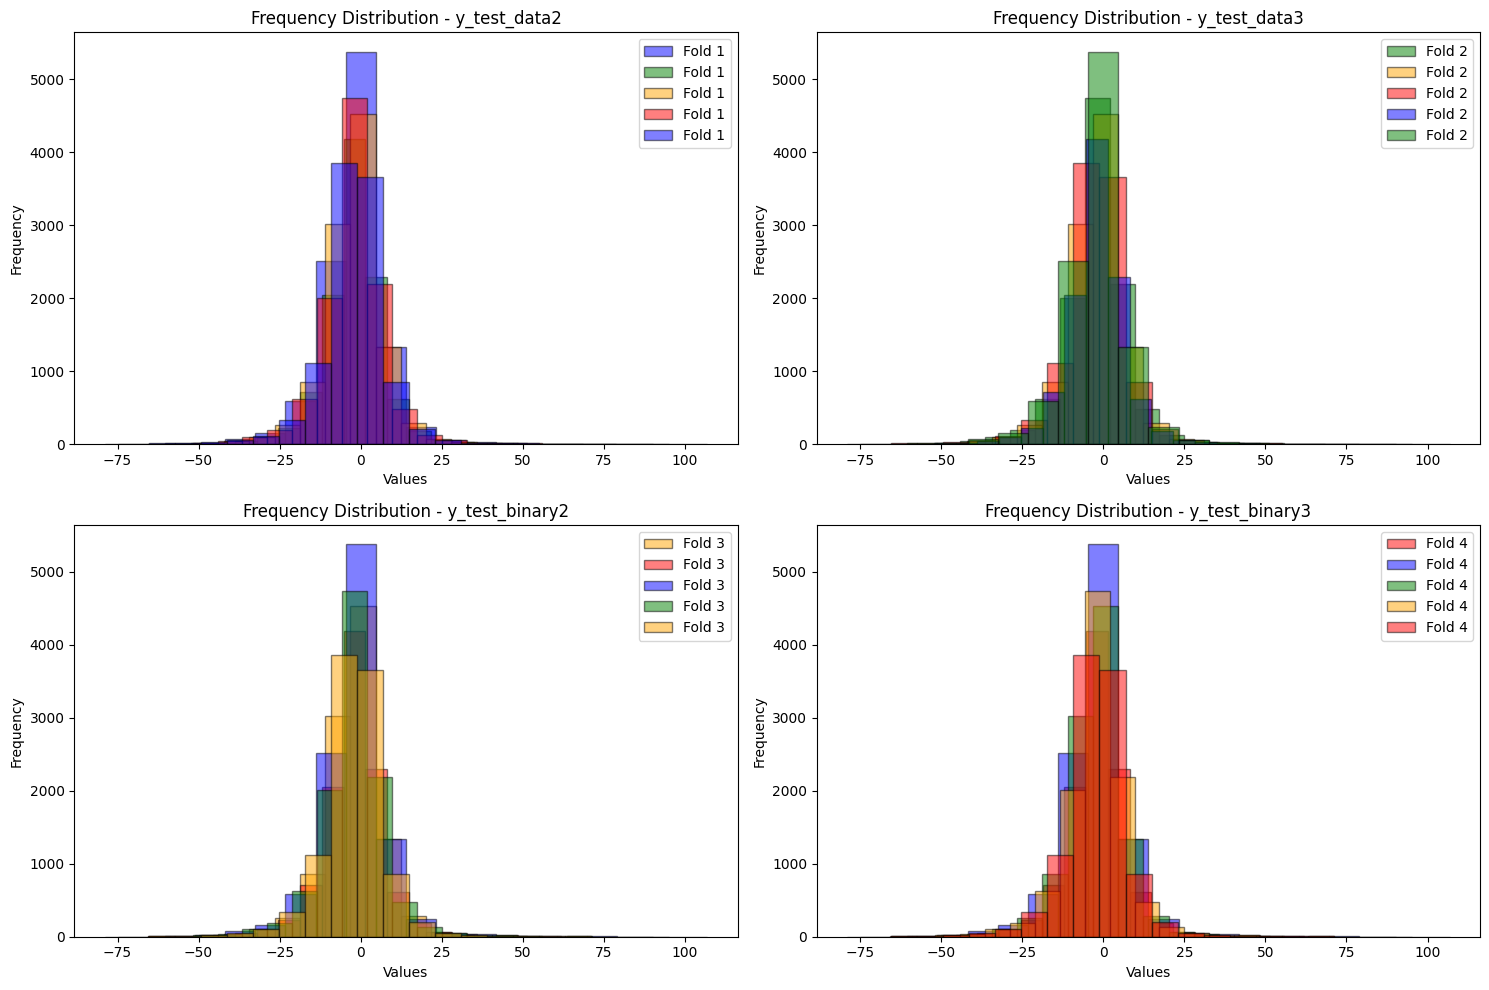

In [35]:
from itertools import cycle
all_lists_with_names = [
    ("y_test_data2", y_test_list_data2),
    ("y_test_data3", y_test_list_data3),
    ("y_test_binary2", y_test_list_bi2),
    ("y_test_binary3", y_test_list_bi3)
]

# Define a cycle of colors for the histograms
colors = cycle(['blue', 'green', 'orange', 'red'])

# Bar plot for the frequency of each value in the datasets
plt.figure(figsize=(15, 10))

for i, (list_name, current_list) in enumerate(all_lists_with_names, 1):
    plt.subplot(2, 2, i)
    for series, color in zip(current_list, colors):
        series.plot(kind='hist', bins=20, alpha=0.5, color=color, edgecolor='black', label=f'Fold {i}')
        plt.title(f'Frequency Distribution - {list_name}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.legend()

plt.tight_layout()
plt.show()

In [36]:
!pip install scikeras

In [37]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model

## Data3


Fold 1 Evaluation Metrics:
Mean Squared Error: 20.5264
Mean Absolute Error: 2.8828
R-squared: 0.7941

Fold 2 Evaluation Metrics:
Mean Squared Error: 18.4670
Mean Absolute Error: 2.7986
R-squared: 0.7914

Fold 3 Evaluation Metrics:
Mean Squared Error: 18.3946
Mean Absolute Error: 2.8126
R-squared: 0.8152

Fold 4 Evaluation Metrics:
Mean Squared Error: 18.0590
Mean Absolute Error: 2.8042
R-squared: 0.8072

Fold 5 Evaluation Metrics:
Mean Squared Error: 19.5818
Mean Absolute Error: 2.8063
R-squared: 0.7990

Overall Mean Evaluation Metrics:
Mean Squared Error: 19.0057
Mean Absolute Error: 2.8209
Mean R-squared: 0.8014


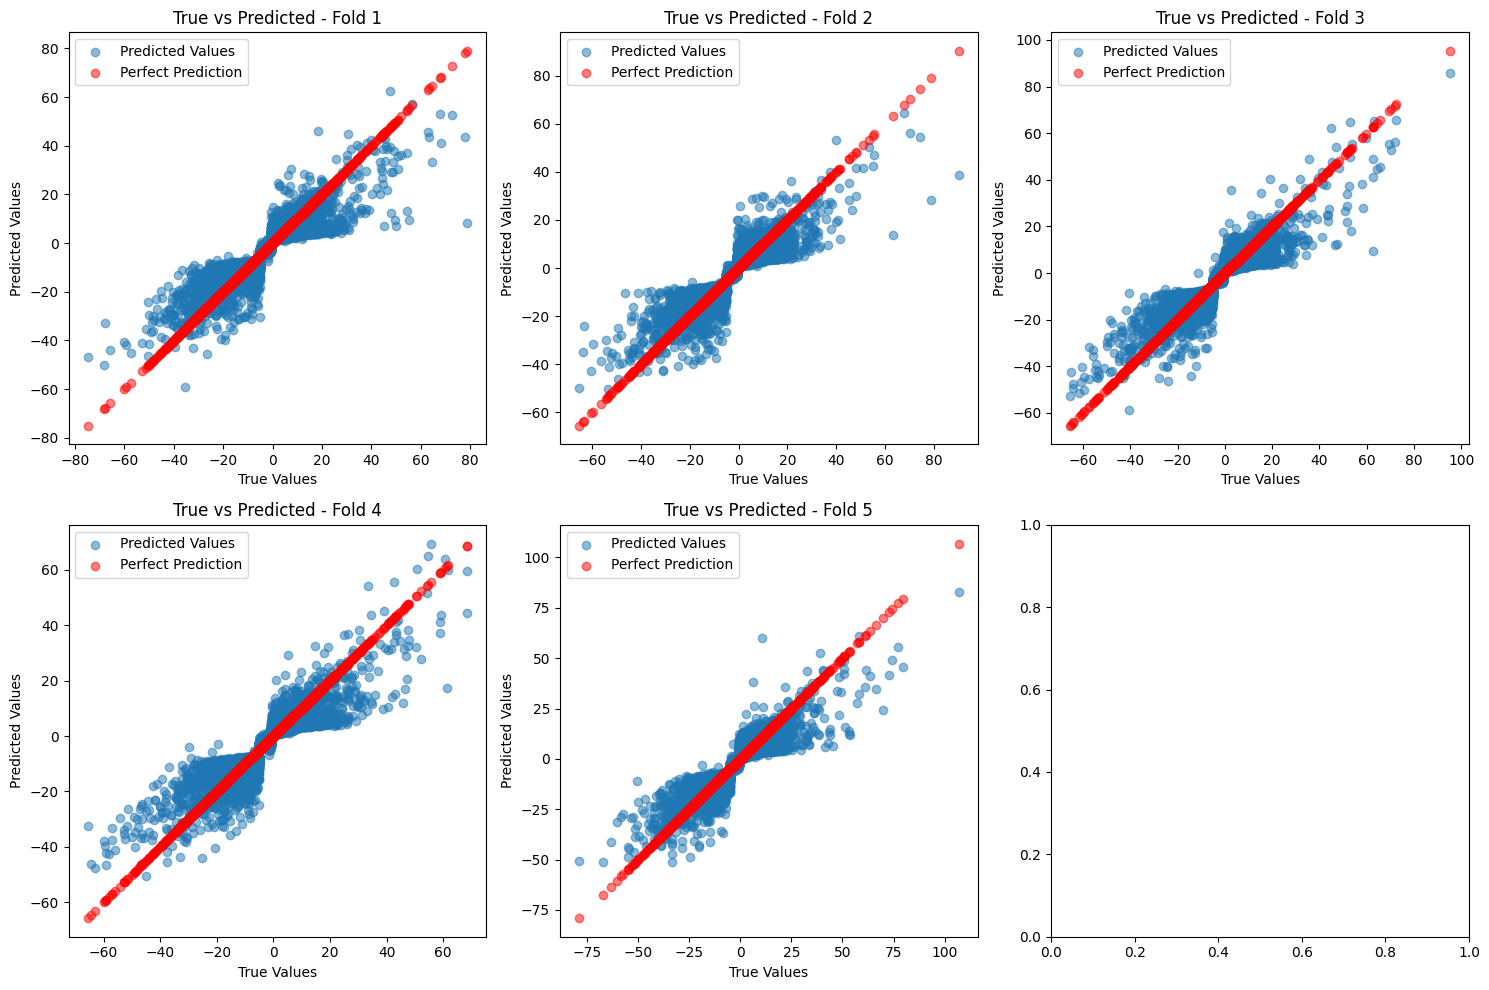

In [38]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBoost Regressor
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

data3_mse_scores = []
data3_mae_scores = []
data3_r2_scores = []

# Create subplots for each fold
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Loop through each fold
for fold in range(5):
    # Fit the model on the training data for the current fold
    model.fit(X_train_scaled_list_data3[fold], y_train_list_data3[fold])

    # Make predictions on the test data for the current fold
    y_pred = model.predict(X_test_scaled_list_data3[fold])

    # Plot original vs predicted values as data points
    axs[fold].scatter(y_test_list_data3[fold], y_pred, label='Predicted Values', alpha=0.5)
    axs[fold].scatter(y_test_list_data3[fold], y_test_list_data3[fold], color='red', label='Perfect Prediction', alpha=0.5)
    axs[fold].set_title(f"True vs Predicted - Fold {fold + 1}")
    axs[fold].set_xlabel("True Values")
    axs[fold].set_ylabel("Predicted Values")
    axs[fold].legend()

    # Evaluate the model performance for the current fold
    mse = mean_squared_error(y_test_list_data3[fold], y_pred)
    mae = mean_absolute_error(y_test_list_data3[fold], y_pred)
    r2 = r2_score(y_test_list_data3[fold], y_pred)

    # Print evaluation metrics for the current fold
    print(f"\nFold {fold + 1} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Append scores to the lists for overall evaluation
    data3_mse_scores.append(mse)
    data3_mae_scores.append(mae)
    data3_r2_scores.append(r2)

# Print mean scores across all folds
data3_mean_mse = sum(data3_mse_scores) / len(data3_mse_scores)
data3_mean_mae = sum(data3_mae_scores) / len(data3_mae_scores)
data3_mean_r2 = sum(data3_r2_scores) / len(data3_r2_scores)

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {data3_mean_mse:.4f}")
print(f"Mean Absolute Error: {data3_mean_mae:.4f}")
print(f"Mean R-squared: {data3_mean_r2:.4f}")

plt.tight_layout()
plt.show()


## Data2


Fold 1 Evaluation Metrics:
Mean Squared Error: 24.0038
Mean Absolute Error: 3.3613
R-squared: 0.7536

Fold 2 Evaluation Metrics:
Mean Squared Error: 22.4535
Mean Absolute Error: 3.3575
R-squared: 0.7603

Fold 3 Evaluation Metrics:
Mean Squared Error: 22.5597
Mean Absolute Error: 3.3499
R-squared: 0.7452

Fold 4 Evaluation Metrics:
Mean Squared Error: 24.8913
Mean Absolute Error: 3.4249
R-squared: 0.7504

Fold 5 Evaluation Metrics:
Mean Squared Error: 22.7290
Mean Absolute Error: 3.3647
R-squared: 0.7717

Overall Mean Evaluation Metrics:
Mean Squared Error: 23.3275
Mean Absolute Error: 3.3717
Mean R-squared: 0.7562


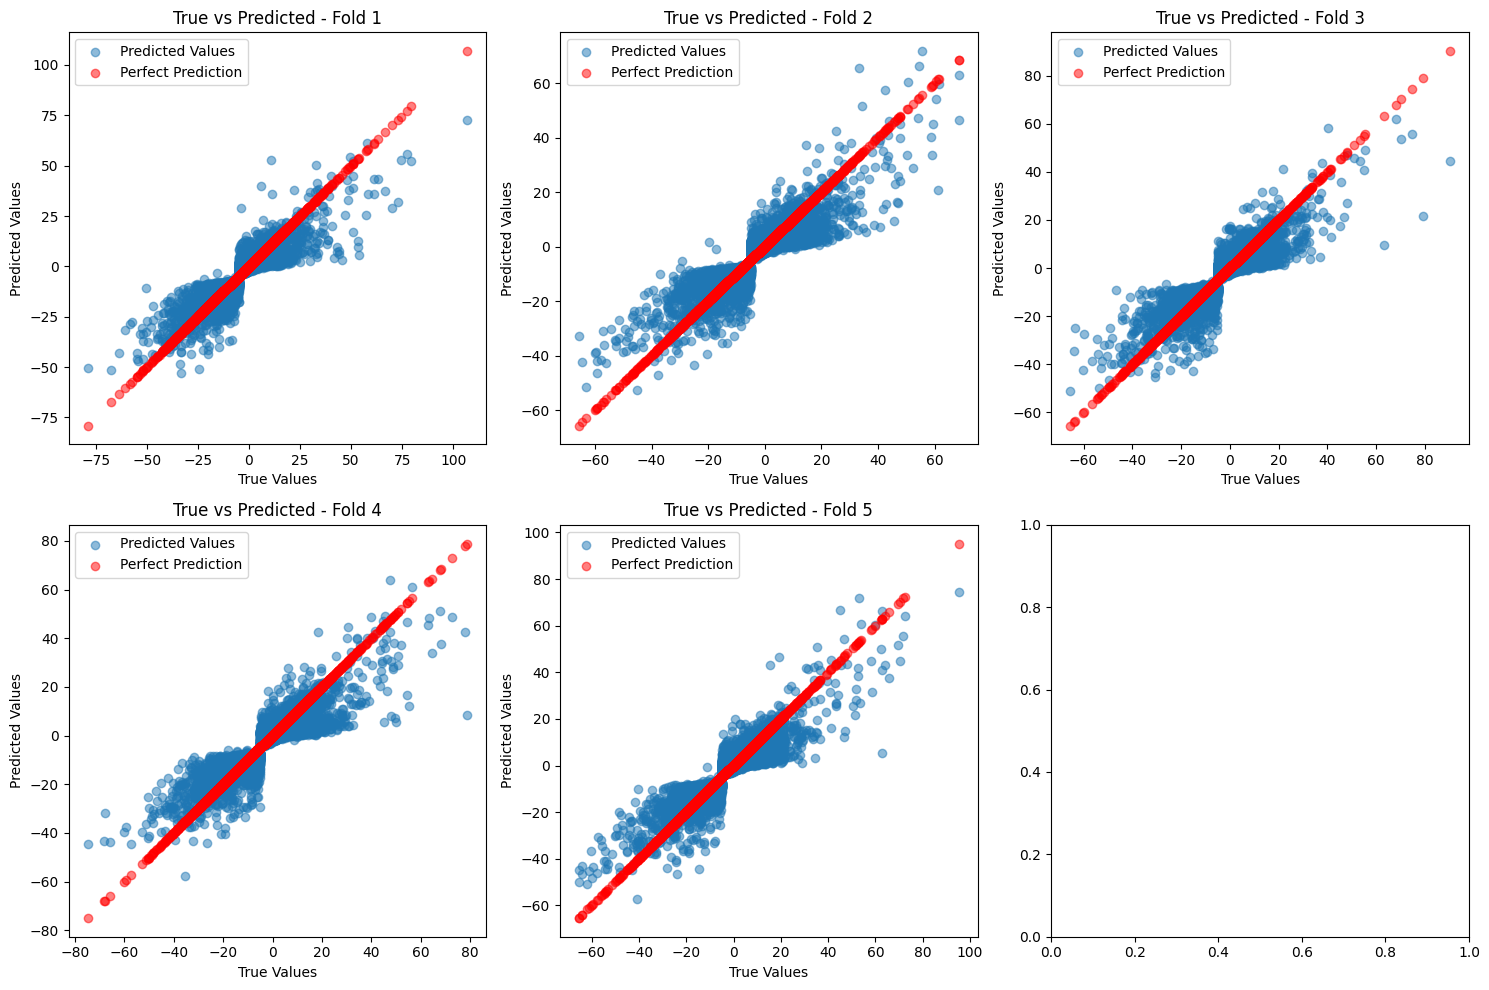

In [39]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

data2_mse_scores = []
data2_mae_scores = []
data2_r2_scores = []

# Create subplots for each fold
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Loop through each fold
for fold in range(5):
    # Fit the model on the training data for the current fold
    model.fit(X_train_scaled_list_data2[fold], y_train_list_data2[fold])

    # Make predictions on the test data for the current fold
    y_pred = model.predict(X_test_scaled_list_data2[fold])

    # Plot original vs predicted values as data points
    axs[fold].scatter(y_test_list_data2[fold], y_pred, label='Predicted Values', alpha=0.5)
    axs[fold].scatter(y_test_list_data2[fold], y_test_list_data2[fold], color='red', label='Perfect Prediction', alpha=0.5)
    axs[fold].set_title(f"True vs Predicted - Fold {fold + 1}")
    axs[fold].set_xlabel("True Values")
    axs[fold].set_ylabel("Predicted Values")
    axs[fold].legend()

    # Evaluate the model performance for the current fold
    mse = mean_squared_error(y_test_list_data2[fold], y_pred)
    mae = mean_absolute_error(y_test_list_data2[fold], y_pred)
    r2 = r2_score(y_test_list_data2[fold], y_pred)

    # Print evaluation metrics for the current fold
    print(f"\nFold {fold + 1} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Append scores to the lists for overall evaluation
    data2_mse_scores.append(mse)
    data2_mae_scores.append(mae)
    data2_r2_scores.append(r2)

# Print mean scores across all folds
data2_mean_mse = sum(data2_mse_scores) / len(data2_mse_scores)
data2_mean_mae = sum(data2_mae_scores) / len(data2_mae_scores)
data2_mean_r2 = sum(data2_r2_scores) / len(data2_r2_scores)

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {data2_mean_mse:.4f}")
print(f"Mean Absolute Error: {data2_mean_mae:.4f}")
print(f"Mean R-squared: {data2_mean_r2:.4f}")

plt.tight_layout()
plt.show()


## Binary2


Fold 1 Evaluation Metrics:
Mean Squared Error: 22.4650
Mean Absolute Error: 3.3409
R-squared: 0.7462

Fold 2 Evaluation Metrics:
Mean Squared Error: 22.2622
Mean Absolute Error: 3.3486
R-squared: 0.7623

Fold 3 Evaluation Metrics:
Mean Squared Error: 23.7928
Mean Absolute Error: 3.3448
R-squared: 0.7557

Fold 4 Evaluation Metrics:
Mean Squared Error: 24.6648
Mean Absolute Error: 3.4063
R-squared: 0.7526

Fold 5 Evaluation Metrics:
Mean Squared Error: 22.4295
Mean Absolute Error: 3.3445
R-squared: 0.7747

Overall Mean Evaluation Metrics:
Mean Squared Error: 23.1229
Mean Absolute Error: 3.3570
Mean R-squared: 0.7583


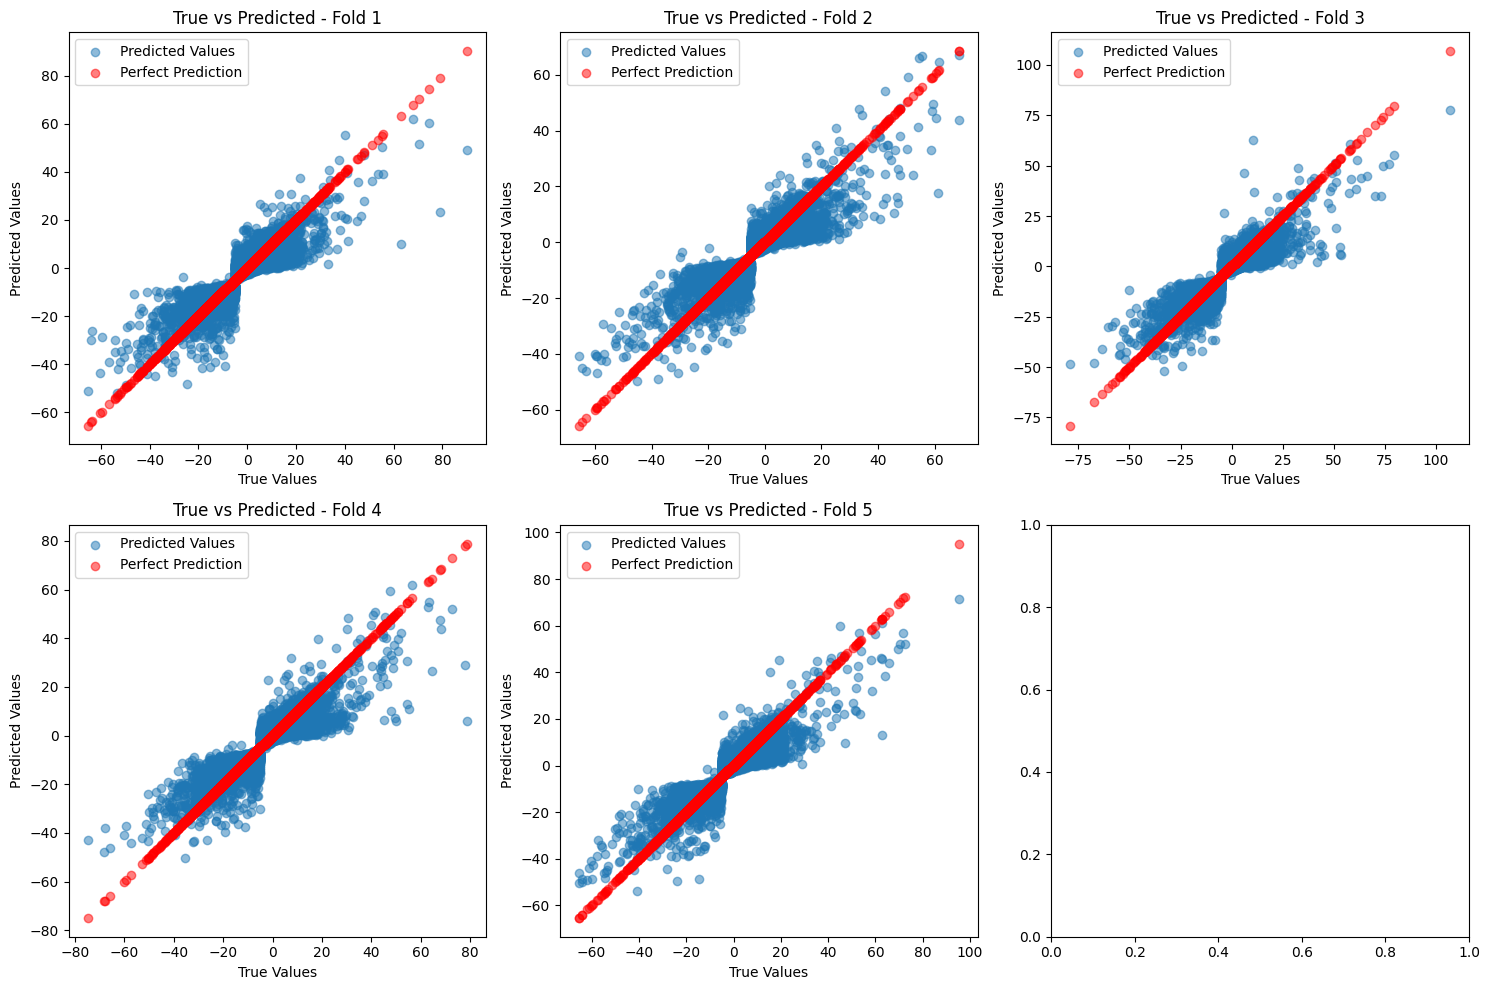

In [40]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

bi2_mse_scores = []
bi2_mae_scores = []
bi2_r2_scores = []

# Create subplots for each fold
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Loop through each fold
for fold in range(5):
    # Fit the model on the training data for the current fold
    model.fit(X_train_scaled_list_bi2[fold], y_train_list_bi2[fold])

    # Make predictions on the test data for the current fold
    y_pred = model.predict(X_test_scaled_list_bi2[fold])

    # Plot original vs predicted values as data points
    axs[fold].scatter(y_test_list_bi2[fold], y_pred, label='Predicted Values', alpha=0.5)
    axs[fold].scatter(y_test_list_bi2[fold], y_test_list_bi2[fold], color='red', label='Perfect Prediction', alpha=0.5)
    axs[fold].set_title(f"True vs Predicted - Fold {fold + 1}")
    axs[fold].set_xlabel("True Values")
    axs[fold].set_ylabel("Predicted Values")
    axs[fold].legend()

    # Evaluate the model performance for the current fold
    mse = mean_squared_error(y_test_list_bi2[fold], y_pred)
    mae = mean_absolute_error(y_test_list_bi2[fold], y_pred)
    r2 = r2_score(y_test_list_bi2[fold], y_pred)

    # Print evaluation metrics for the current fold
    print(f"\nFold {fold + 1} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Append scores to the lists for overall evaluation
    bi2_mse_scores.append(mse)
    bi2_mae_scores.append(mae)
    bi2_r2_scores.append(r2)

# Print mean scores across all folds
bi2_mean_mse = sum(bi2_mse_scores) / len(bi2_mse_scores)
bi2_mean_mae = sum(bi2_mae_scores) / len(bi2_mae_scores)
bi2_mean_r2 = sum(bi2_r2_scores) / len(bi2_r2_scores)

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {bi2_mean_mse:.4f}")
print(f"Mean Absolute Error: {bi2_mean_mae:.4f}")
print(f"Mean R-squared: {bi2_mean_r2:.4f}")

plt.tight_layout()
plt.show()


## Binary3


Fold 1 Evaluation Metrics:
Mean Squared Error: 17.8812
Mean Absolute Error: 2.7863
R-squared: 0.8091

Fold 2 Evaluation Metrics:
Mean Squared Error: 19.1088
Mean Absolute Error: 2.7935
R-squared: 0.8038

Fold 3 Evaluation Metrics:
Mean Squared Error: 18.5891
Mean Absolute Error: 2.7985
R-squared: 0.7900

Fold 4 Evaluation Metrics:
Mean Squared Error: 20.3879
Mean Absolute Error: 2.8717
R-squared: 0.7955

Fold 5 Evaluation Metrics:
Mean Squared Error: 18.3099
Mean Absolute Error: 2.8067
R-squared: 0.8161

Overall Mean Evaluation Metrics:
Mean Squared Error: 18.8554
Mean Absolute Error: 2.8113
Mean R-squared: 0.8029


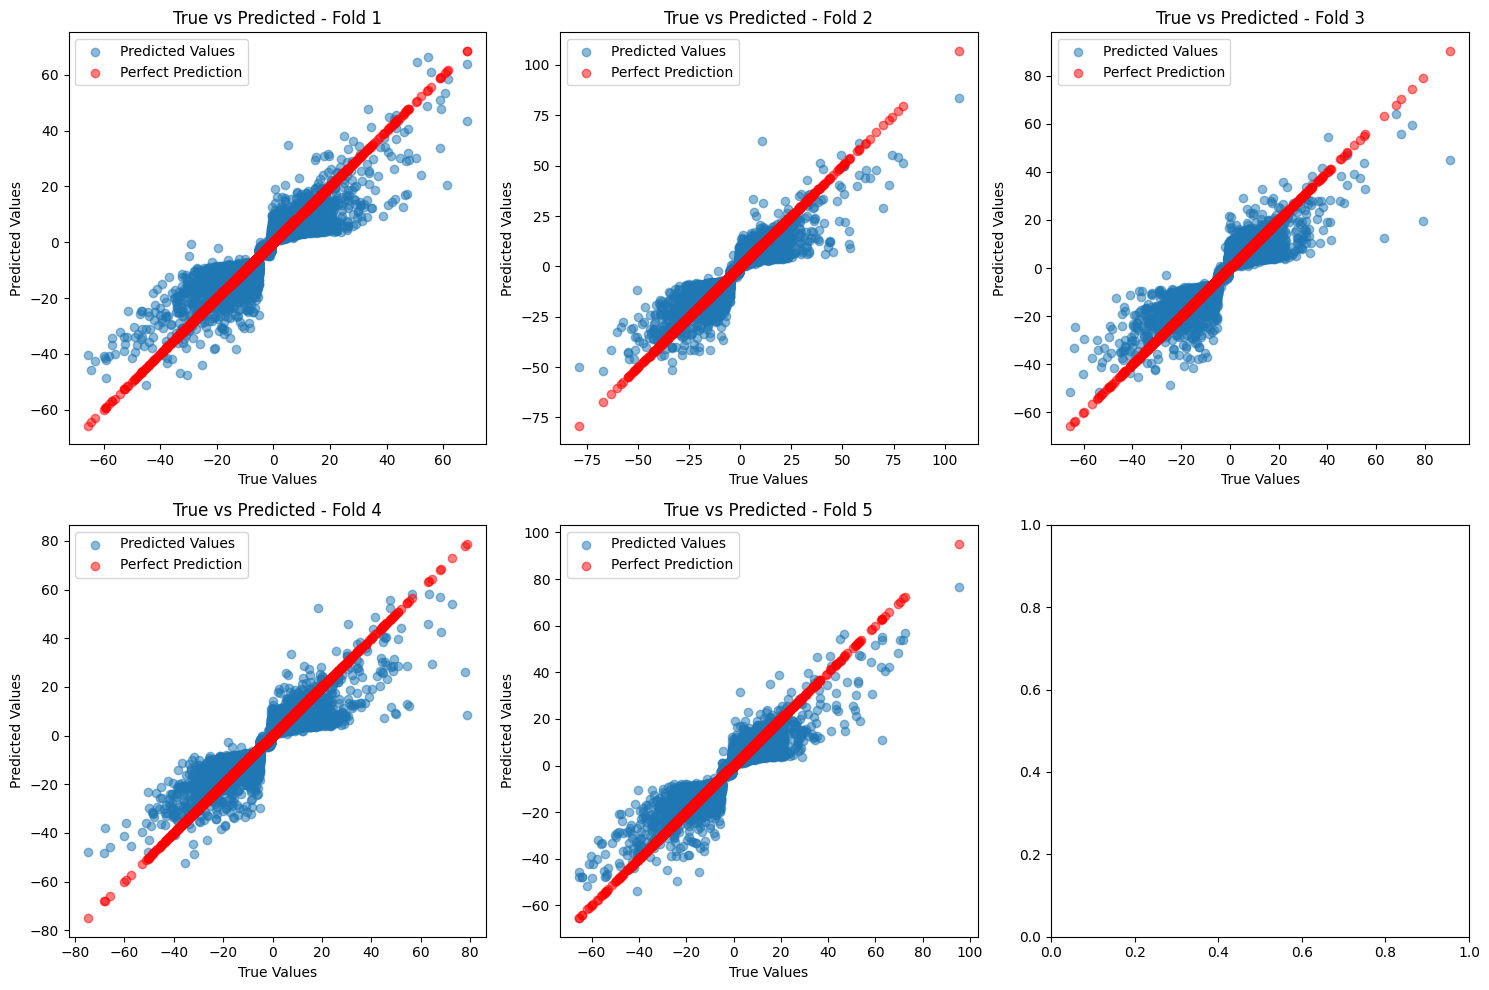

In [41]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

bi3_mse_scores = []
bi3_mae_scores = []
bi3_r2_scores = []

# Create subplots for each fold
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# Loop through each fold
for fold in range(5):
    # Fit the model on the training data for the current fold
    model.fit(X_train_scaled_list_bi3[fold], y_train_list_bi3[fold])

    # Make predictions on the test data for the current fold
    y_pred = model.predict(X_test_scaled_list_bi3[fold])

    # Plot original vs predicted values as data points
    axs[fold].scatter(y_test_list_bi3[fold], y_pred, label='Predicted Values', alpha=0.5)
    axs[fold].scatter(y_test_list_bi3[fold], y_test_list_bi3[fold], color='red', label='Perfect Prediction', alpha=0.5)
    axs[fold].set_title(f"True vs Predicted - Fold {fold + 1}")
    axs[fold].set_xlabel("True Values")
    axs[fold].set_ylabel("Predicted Values")
    axs[fold].legend()

    # Evaluate the model performance for the current fold
    mse = mean_squared_error(y_test_list_bi3[fold], y_pred)
    mae = mean_absolute_error(y_test_list_bi3[fold], y_pred)
    r2 = r2_score(y_test_list_bi3[fold], y_pred)

    # Print evaluation metrics for the current fold
    print(f"\nFold {fold + 1} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    # Append scores to the lists for overall evaluation
    bi3_mse_scores.append(mse)
    bi3_mae_scores.append(mae)
    bi3_r2_scores.append(r2)

# Print mean scores across all folds
bi3_mean_mse = sum(bi3_mse_scores) / len(bi3_mse_scores)
bi3_mean_mae = sum(bi3_mae_scores) / len(bi3_mae_scores)
bi3_mean_r2 = sum(bi3_r2_scores) / len(bi3_r2_scores)

print(f"\nOverall Mean Evaluation Metrics:")
print(f"Mean Squared Error: {bi3_mean_mse:.4f}")
print(f"Mean Absolute Error: {bi3_mean_mae:.4f}")
print(f"Mean R-squared: {bi3_mean_r2:.4f}")

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data3_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': data3_mse_scores,
    'MAE': data3_mae_scores,
    'R2': data3_r2_scores
})

data2_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': data2_mse_scores,
    'MAE': data2_mae_scores,
    'R2': data2_r2_scores
})

bi3_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': bi3_mse_scores,
    'MAE': bi3_mae_scores,
    'R2': bi3_r2_scores
})

bi2_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'MSE': bi2_mse_scores,
    'MAE': bi2_mae_scores,
    'R2': bi2_r2_scores
})

# Concatenate the DataFrames to create a summary DataFrame
summary_df = pd.concat({
    'Data3': data3_df,
    'Data2': data2_df,
    'Binary3': bi3_df,
    'Binary2': bi2_df
}, axis=1)

summary_df


Data3                                Data2                                 \
   Fold        MSE       MAE        R2  Fold        MSE       MAE        R2   
0     1  20.526381  2.882784  0.794139     1  24.003797  3.361267  0.753564   
1     2  18.466998  2.798647  0.791408     2  22.453537  3.357455  0.760291   
2     3  18.394563  2.812628  0.815214     3  22.559653  3.349948  0.745180   
3     4  18.058965  2.804190  0.807207     4  24.891343  3.424945  0.750363   
4     5  19.581752  2.806289  0.798963     5  22.729029  3.364685  0.771671   

  Binary3                                Binary2                       \
     Fold        MSE       MAE        R2    Fold        MSE       MAE   
0       1  17.881172  2.786305  0.809105       1  22.465041  3.340897   
1       2  19.108842  2.793460  0.803819       2  22.262241  3.348630   
2       3  18.589111  2.798455  0.790028       3  23.792834  3.344818   
3       4  20.387918  2.871698  0.795528       4  24.664753  3.406328   
4       5  18.309874  2.806728  0.816065       5  22.429468  3.344486   

             
         R2  
0  0.746248  
1  0.762334  
2  0.755730  
3  0.752635  
4  0.774680

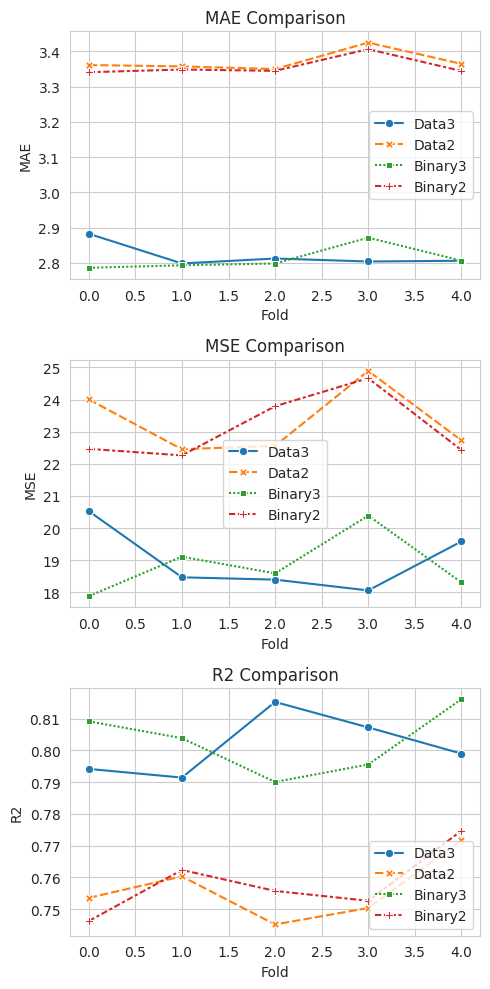

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create subplots for MAE, MSE, and R2
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))

# List of metrics
metrics = ['MAE', 'MSE', 'R2']

# Loop through each metric and create a line plot
for i, metric in enumerate(metrics):
    sns.lineplot(data=summary_df.xs(metric, axis=1, level=1), markers=True, ax=axes[i])

    # Add titles and labels
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Fold')
    axes[i].set_ylabel(metric)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Data3 ดีสุด